In [23]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import quickMTF.mtf as mtf
from quickMTF.mtf import SFR

%matplotlib inline

In [24]:
plot = True
verbose = True

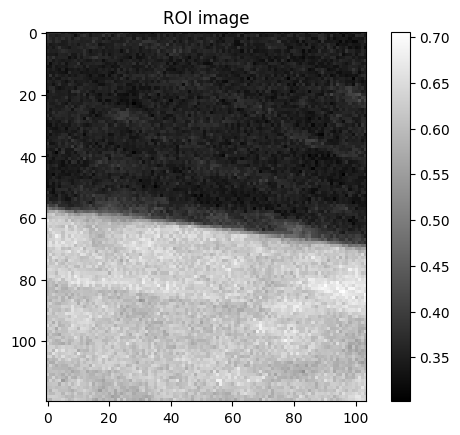

In [25]:
# load ROI image
image = np.load(r"..\quickMTF\sample_hori_edge.npy")
image = np.load(r"..\quickMTF\sample_vert_edge.npy")
image = np.load(r"..\quickMTF\sample.npy")
# image = np.load(r"C:\Users\Lucas\Desktop\for\for Lucas\sample.npy")

sample = image

if plot:
    mtf.plot_roi_image(image)

rotated: False


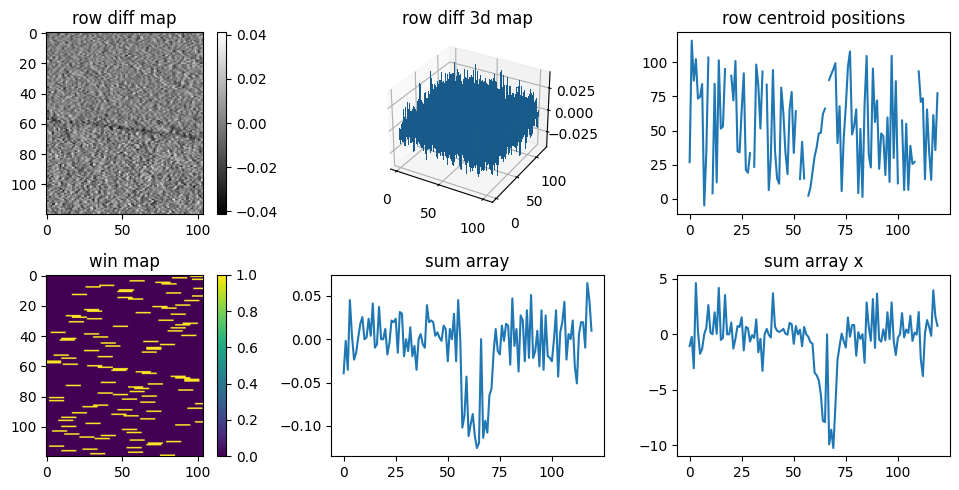

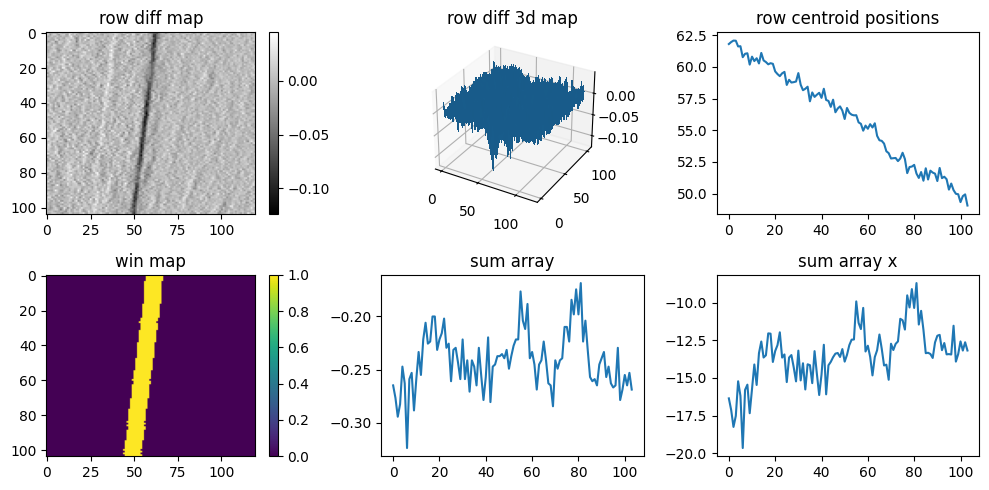

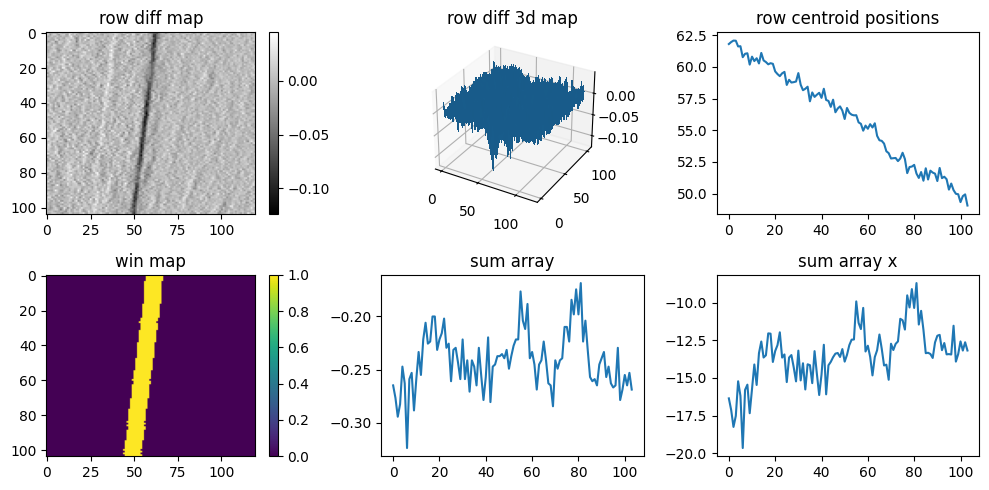

In [26]:
sfr = SFR(image)
original_roi_info, rotated_roi_info, roi_info, esf_info, lsf_info, mtf_info, status_info = sfr.get_mtf()

if verbose:
    print(f"rotated: {roi_info.centroid_info.rotated}")

if plot:
    mtf.plot_centroid_and_stats(original_roi_info)

if plot:
    mtf.plot_centroid_and_stats(rotated_roi_info)

if plot:
    mtf.plot_centroid_and_stats(roi_info)


In [27]:
# pcoefs, slope, offset, angle, idx, patch_shape, centr = edge_info.
if verbose:
    print(f"pcoefs: {roi_info.edge_info.pcoefs}")
    print(f"slope: {roi_info.edge_info.slope}")
    print(f"angle: {roi_info.edge_info.angle}")
    print(f"idx: {roi_info.edge_info.idx}")
    print(f"patch_shape: {roi_info.edge_info.patch_shape}")
    # print(f"image_for_mtf.shape: {centroid_info.image_for_mtf.shape}")


pcoefs: [0.0, np.float64(-0.12371757964434162), np.float64(62.296474878805924)]
slope: -0.12371757964434162
angle: -7.052658112261685
idx: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102]
patch_shape: (104, 120)


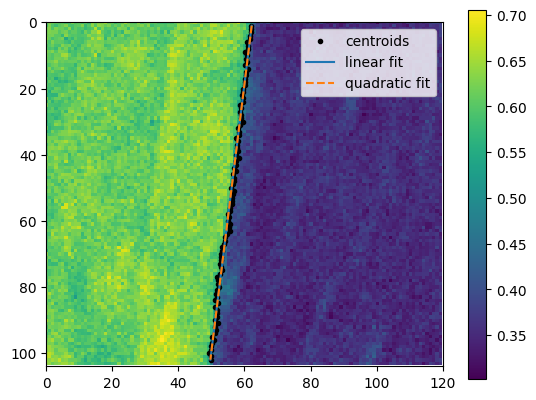

In [28]:
if plot:
    mtf.plot_edge_and_stats(roi_info.centroid_info.image_for_mtf, roi_info.edge_info.pcoefs, roi_info.edge_info.slope, roi_info.edge_info.offset, roi_info.edge_info.angle, roi_info.edge_info.idx, roi_info.edge_info.patch_shape, roi_info.edge_info.centr, roi_info.centroid_info.rotated)

dist.shape: (104, 120)


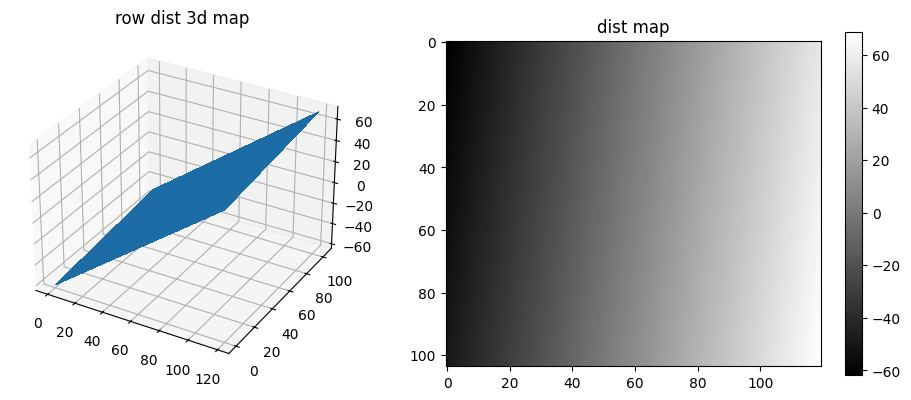

In [29]:
# Calculate distance (with sign) from each point (x, y) in the
# image patch "data" to the slanted edge
quadratic_fit = False
# dist = edge_info.dist
if verbose:
    print(f"dist.shape: {roi_info.edge_info.dist.shape}")

if plot:
    mtf.plot_dist_and_stats(roi_info.edge_info.dist)

esf.shape: (524,)


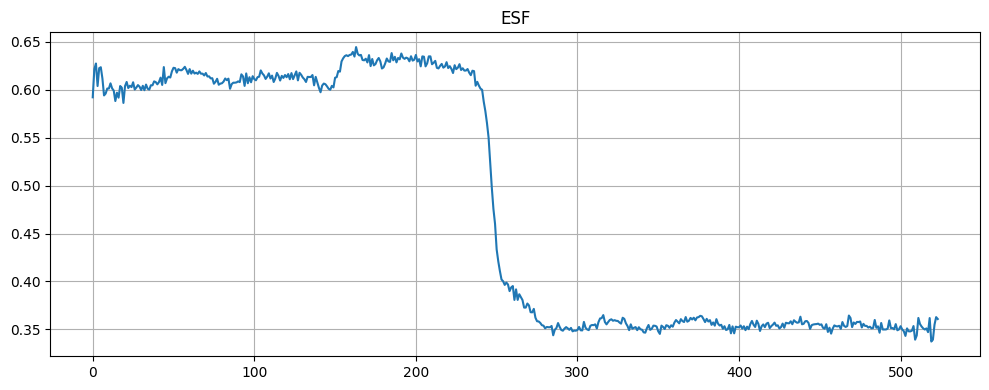

In [30]:
# ESF
if esf_info.esf is False:
    print("esf is invalid")

if verbose:
    print(f"esf.shape: {esf_info.esf.shape}")

if plot:
    mtf.plot_esf_and_stats(esf_info.esf)

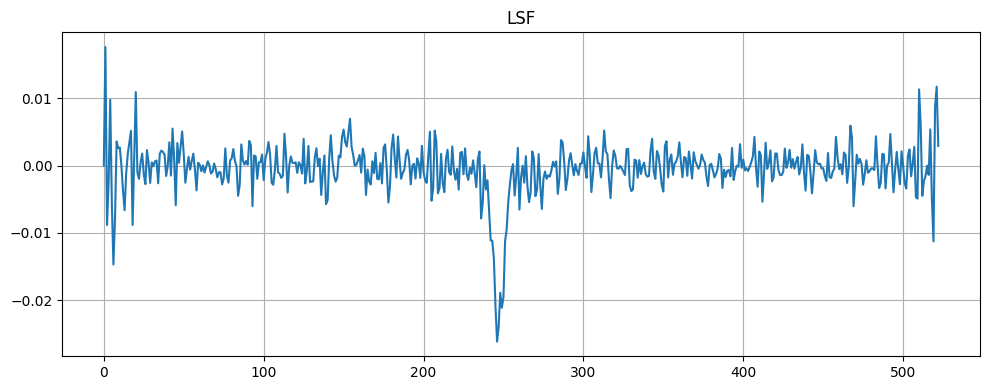

hann_width: 126
idx2: [182, 342]


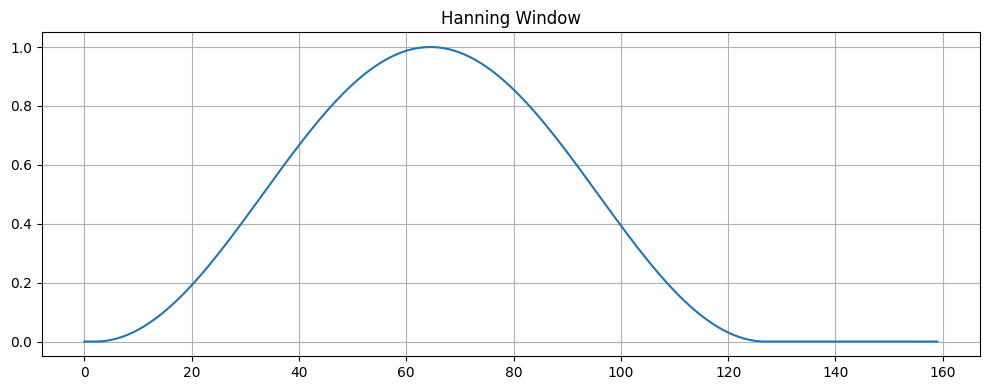

In [31]:
## LSF
if plot:
    mtf.plot_lsf_and_stats(lsf_info.lsf[0:-1])

## Hann window
window_info = lsf_info.window_info  # define window to be applied on LSF
if window_info.hann_width >350:  # sorting out no slant edge
    print("wrong!")

if verbose:
    print(f"hann_width: {window_info.hann_width}")
    print(f"idx2: {window_info.idx2}")

if plot:
    mtf.plot_filter_window_and_stats(window_info.hann_win)

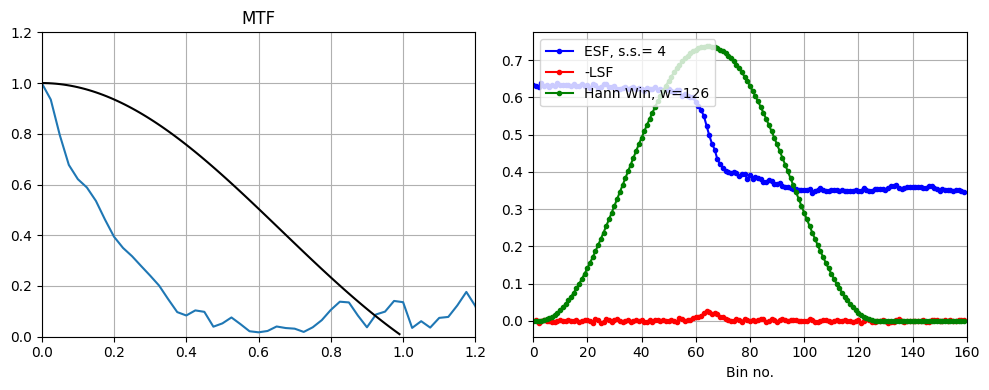

In [32]:
## MTF
## status
rotated, angle_cw, offset = status_info

mtf.plot_mtf_and_stats(mtf_info.mtf_result, esf_info.esf, window_info.hann_win, window_info.hann_width, lsf_info.lsf, window_info.idx2, esf_info.super_sampling)